## LogisticRegression Classifier for lung image classification

In [1]:
import matplotlib.pyplot as plt
from IPython import display
import numpy as np

### Load the data

In [2]:
a=np.load('pneumoniamnist.npz')
x_train=a['train_images']
#x_val=a['val_images']
x_test=a['test_images']
y_train=a['train_labels']
#y_val=a['val_labels']
y_test=a['test_labels']

In [3]:
x_train.shape

(4708, 28, 28)

In [4]:
y_train.shape

(4708, 1)

In [5]:
x_test.shape

(624, 28, 28)

In [6]:
y_test.shape

(624, 1)

In [7]:
x_train[0].shape

(28, 28)

In [8]:
x_train.min()

0.0

In [9]:
x_train.max()

255.0

In [10]:
x_train[0].dtype

dtype('float64')

### Preprocess the data
normalize the value of every pixel into the range of 0 to 1

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [12]:
x_train.min()

0.0

In [13]:
x_train.max()

1.0

reshape y to a 1D array

In [14]:
y_train.shape

(4708, 1)

In [15]:
y_train=y_train.reshape(-1)

In [16]:
y_train.shape

(4708,)

In [17]:
y_test.shape

(624, 1)

In [18]:
y_test=y_test.reshape(-1)

In [19]:
y_test.shape

(624,)

reshape each image (2D array) into a vector (1D array)

In [20]:
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)
print(x_train.shape[0], 'training samples')
print(x_test.shape[0], 'test samples')

4708 training samples
624 test samples


### Show the lung images

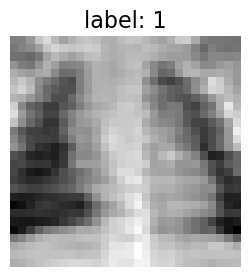

<Figure size 640x480 with 0 Axes>

In [21]:
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, x_train.shape[0], 100):
    I = x_train[n,:].reshape(28,28)
    ax.imshow(I, cmap='gray')
    ax.set_title('label: ' + str(int(y_train[n])), fontsize=16)
    ax.axis('off')
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(1) 

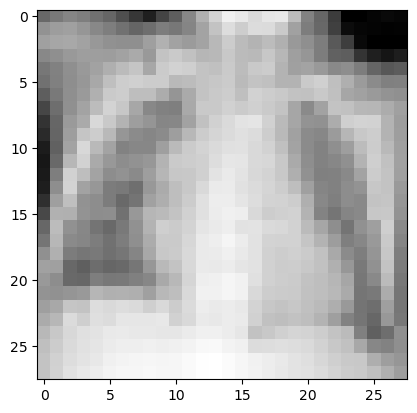

In [22]:
#the first image in the training set
plt.imshow(x_train[0].reshape(28,28), cmap='gray')

In [23]:
#the class label of the first training sample
y_train[0]

1.0

### Build a Classifier

In [24]:
from sklearn.linear_model import LogisticRegression
# instance of the classifier
model = LogisticRegression(solver='newton-cg')

### Train the model on the training set: x_train, y_train

In [25]:
model.fit(x_train, y_train)

C:\Programs\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Programs\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


LogisticRegression(solver='newton-cg')

In [26]:
model.score(x_train, y_train)

0.969838572642311

### Evaluate the model on the test set: x_test, y_test

In [27]:
x_test.shape

(624, 784)

In [28]:
y_test.shape

(624,)

In [29]:
model.score(x_test, y_test)

0.8461538461538461

In [30]:
y_test_pred=model.predict(x_test)
acc_test = np.sum(y_test_pred == y_test)/y_test.shape[0]
print('Test accuracy:', acc_test)

Test accuracy: 0.8461538461538461


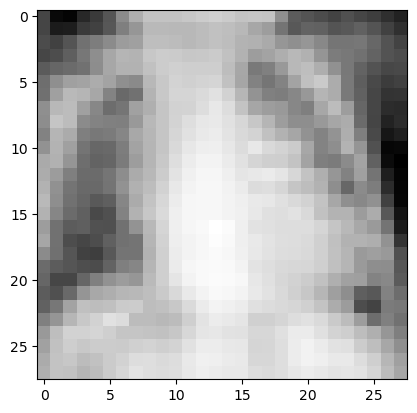

In [31]:
#the first image in the test set
plt.imshow(x_test[0].reshape(28,28), cmap='gray')

In [32]:
y_test_pred[0]

1.0

In [33]:
y_test[0]

1.0